# 네이버 영화 리뷰 데이터


    네이버 영화 리뷰 데이터 셋인 https://github.com/e9t/nsmc 에서 다운로드함.
    ratings.txt 대신 raw data 읽어와서 csv 파일로 저장.
        
    추후 감성 분석 데이터로 사용.

## raw data 읽어오기

In [1]:
import os
import json
import pandas as pd
from tqdm import tqdm

root = 'raw/{}'
files = os.listdir('raw')

df = pd.DataFrame()

for file in tqdm(files) : 
    path = root.format(file)
    tojson = open(path).read()
    
    info = json.loads(tojson)

    df = df.append(pd.json_normalize(info))
    
df.info()

100%|██████████| 14730/14730 [08:53<00:00, 27.62it/s]


<class 'pandas.core.frame.DataFrame'>
Int64Index: 712404 entries, 0 to 88
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   review_id  712404 non-null  object
 1   movie_id   712404 non-null  object
 2   author     712404 non-null  object
 3   review     712404 non-null  object
 4   rating     712404 non-null  object
 5   date       712404 non-null  object
dtypes: object(6)
memory usage: 38.0+ MB


In [2]:
# raw review data 저장

df.to_csv('naver_movie_reviews_raw.csv',index=False)

In [3]:
# review_id , movie_id , author, date column 삭제

drop_col = ['review_id','movie_id','author','date']

df.drop(drop_col,axis=1,inplace=True)
df.head()

,review,rating
0,종합 평점은 4점 드립니다.,4
1,원작이 칭송받는 이유는 웹툰 계 자체의 질적 저하가 심각하기 때문. 원작이나 영화...,1
2,나름의 감동도 있고 안타까운 마음에 가슴도 먹먹 배우들의 연기가 good 김수현...,10
3,이런걸 돈주고 본 내자신이 후회스럽다 최악의 쓰레기 영화 김수현 밖에없는 저질 삼류영화,1
4,"초반엔 코미디, 후반엔 액션, 결론은 코미디.",7


<AxesSubplot:>

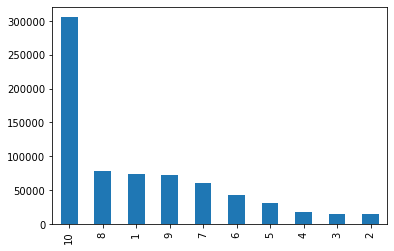

In [4]:
# rating 비율
df['rating'].value_counts().plot(kind='bar')

# 긍정 데이터가 많다. 
# 1-4 : 부정(0) / 5-8 : 중립(1) / 9-10 : 긍정(2) 으로 레이블링

In [41]:
mapping = {1:0,2:0,3:0,4:0,5:1,6:1,7:1,8:1,9:2,10:2}
df['label'] = df['rating'].map(mapping)
df.head()

,review,rating,label
0,종합 평점은 4점 드립니다.,4,0
1,원작이 칭송받는 이유는 웹툰 계 자체의 질적 저하가 심각하기 때문. 원작이나 영화...,1,0
2,나름의 감동도 있고 안타까운 마음에 가슴도 먹먹 배우들의 연기가 good 김수현...,10,2
3,이런걸 돈주고 본 내자신이 후회스럽다 최악의 쓰레기 영화 김수현 밖에없는 저질 삼류영화,1,0
4,"초반엔 코미디, 후반엔 액션, 결론은 코미디.",7,1


In [47]:
# rating 제거 후 csv파일로 저장.

df.drop(['rating'],axis=1,inplace=True)
df.to_csv('naver_movie_reviews.csv',index=False)

## 레이블링 범위를 다르게 잡아서 진행.

1-4 : 부정(0) / 5-8 : 중립(1) / 9-10 : 긍정(2) 으로 레이블링 -> https://github.com/e9t/nsmc 에서 한 범위와 같다.

In [5]:
mapping = {1:0,2:0,3:0,4:0,5:1,6:1,7:1,8:1,9:2,10:2}
df['label'] = df['rating'].map(mapping)
df.head()

,review,rating,label
0,종합 평점은 4점 드립니다.,4,0
1,원작이 칭송받는 이유는 웹툰 계 자체의 질적 저하가 심각하기 때문. 원작이나 영화...,1,0
2,나름의 감동도 있고 안타까운 마음에 가슴도 먹먹 배우들의 연기가 good 김수현...,10,2
3,이런걸 돈주고 본 내자신이 후회스럽다 최악의 쓰레기 영화 김수현 밖에없는 저질 삼류영화,1,0
4,"초반엔 코미디, 후반엔 액션, 결론은 코미디.",7,1


In [6]:
df.drop(['rating'],axis=1,inplace=True)
df.to_csv('naver_movie_reviews_ver2.csv',index=False)

# 리뷰 길이 제한
20 이상으로 제한.

In [1]:
import pandas as pd

df = pd.read_csv('naver_movie_reviews_raw.csv')

# review_id , movie_id , author, date column 삭제

drop_col = ['review_id','movie_id','author','date']

df.drop(drop_col,axis=1,inplace=True)

mapping = {1:0,2:0,3:0,4:0,5:1,6:1,7:1,8:1,9:2,10:2}
df['label'] = df['rating'].map(mapping)
df.head()


,review,rating,label
0,종합 평점은 4점 드립니다.,4,0
1,원작이 칭송받는 이유는 웹툰 계 자체의 질적 저하가 심각하기 때문. 원작이나 영화...,1,0
2,나름의 감동도 있고 안타까운 마음에 가슴도 먹먹 배우들의 연기가 good 김수현...,10,2
3,이런걸 돈주고 본 내자신이 후회스럽다 최악의 쓰레기 영화 김수현 밖에없는 저질 삼류영화,1,0
4,"초반엔 코미디, 후반엔 액션, 결론은 코미디.",7,1


In [2]:
# review 데이터 한글, 공백 제외 제거

df['review'] = df['review'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','')
df.head()

<ipython-input-2-ea4cbfc0358c>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['review'] = df['review'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','')


,review,rating,label
0,종합 평점은 점 드립니다,4,0
1,원작이 칭송받는 이유는 웹툰 계 자체의 질적 저하가 심각하기 때문 원작이나 영화나...,1,0
2,나름의 감동도 있고 안타까운 마음에 가슴도 먹먹 배우들의 연기가 김수현 최고,10,2
3,이런걸 돈주고 본 내자신이 후회스럽다 최악의 쓰레기 영화 김수현 밖에없는 저질 삼류영화,1,0
4,초반엔 코미디 후반엔 액션 결론은 코미디,7,1


## 리뷰 길이 최소 20으로 제한

mean length :  32.508973840685904


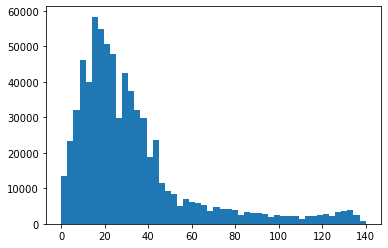

In [3]:
import matplotlib.pyplot as plt

print("mean length : ",sum([len(str(review)) for review in df['review']]) / len(df['review']))
plt.hist([len(str(review)) for review in df['review']],bins=50);

In [4]:
drop_idx  = []
for idx, review in enumerate(df['review']) :
    if len(str(review)) < 20 : 
        drop_idx.append(idx)

In [6]:
df.drop(drop_idx,inplace=True)

mean length :  44.99603016534226


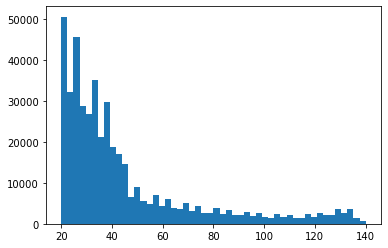

In [8]:
print("mean length : ",sum([len(str(review)) for review in df['review']]) / len(df['review']))
plt.hist([len(str(review)) for review in df['review']],bins=50);

In [9]:
df.to_csv('naver_movie_reviews_limit_length.csv',index=False)